In [25]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Download the dataset
path = kagglehub.dataset_download("shreyasur965/democracy-index")

# Print the path to the dataset files
print("Path to dataset files:", path)

# List the contents of the directory where the dataset is saved
dataset_files = os.listdir(path)

# Print out the files in the dataset
print("Files in the dataset:", dataset_files)

# Check if there are any files to load
if dataset_files:
    # Assuming the dataset is a CSV file and we are using the first file in the list
    csv_path = os.path.join(path, dataset_files[0])  # Replace with a specific file if necessary
    data = pd.read_csv(csv_path)

    # Print the data types of each column
    print("Data types of each column:")
    print(data.dtypes)

    # Drop rows where 'Code' is NaN
    data = data.dropna(subset=['Code'])

    # Print the number of missing values per column
    missing_count = data.isnull().sum()
    print("Missing values per column:")
    print(missing_count)

    # Basic Statistics using NumPy

    # Assuming the 'Democracy score' column exists
    if 'Democracy score' in data.columns:
        democracy_scores = data['Democracy score']

        # Mean and Median
        mean_score = np.mean(democracy_scores)
        median_score = np.median(democracy_scores)
        print(f"Mean of Democracy Score: {mean_score}")
        print(f"Median of Democracy Score: {median_score}")

        # Standard Deviation and Variance
        std_dev = np.std(democracy_scores)
        variance = np.var(democracy_scores)
        print(f"Standard Deviation of Democracy Score: {std_dev}")
        print(f"Variance of Democracy Score: {variance}")

        # Minimum and Maximum
        min_score = np.min(democracy_scores)
        max_score = np.max(democracy_scores)
        print(f"Minimum Democracy Score: {min_score}")
        print(f"Maximum Democracy Score: {max_score}")

        # Sum and Product
        total_sum = np.sum(democracy_scores)
        total_product = np.prod(democracy_scores)
        print(f"Sum of Democracy Scores: {total_sum}")
        print(f"Product of Democracy Scores: {total_product}")
    else:
        print("'Democracy score' column not found in the dataset.")
else:
    print("No files found in the dataset directory.")

Path to dataset files: C:\Users\rauti\.cache\kagglehub\datasets\shreyasur965\democracy-index\versions\2
Files in the dataset: ['democracy-index-eiu.csv', 'democracy_index_eiu_column_descriptors.txt']
Data types of each column:
Entity              object
Code                object
Year                 int64
Democracy score    float64
dtype: object
Missing values per column:
Entity             0
Code               0
Year               0
Democracy score    0
dtype: int64
Mean of Democracy Score: 5.480996332783815
Median of Democracy Score: 5.76
Standard Deviation of Democracy Score: 2.2139269532165926
Variance of Democracy Score: 4.901472554178904
Minimum Democracy Score: 0.32
Maximum Democracy Score: 9.93
Sum of Democracy Scores: 14628.779212200001
Product of Democracy Scores: inf


c:\Python313\Lib\site-packages\numpy\_core\_methods.py:57: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


In [26]:
## lets find out how many datas are missing per column
missing_count = data.isnull().sum()
print(missing_count)

Entity             0
Code               0
Year               0
Democracy score    0
dtype: int64


In [27]:
data["Entity"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',

In [28]:
# lets create a new data frame by dropping all null values
data1=data.dropna(axis=0, how='any') # axis=0 means rows are taken into account and how='any': a row is dropped if it contains at least one NaN value.
data1.shape

(2669, 4)

In [29]:
#Pandas duplicated() method returns the boolean series
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72      False
73      False
74      False
75      False
76      False
77      False
78      False
79      False
80      False
81      False
82      False
83      False
84      False
85      False
86      False
87    

In [30]:
# Replace all NaN elements with 0s
df3 = data.fillna(0)

In [31]:
import pandas as pd
import os

# Load the CSV file (replace with your actual file path if needed)
csv_file = dataset_files[0]  # Replace this with the file you want to load if necessary
csv_path = os.path.join(path, csv_file)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_path)

# Let's assume the column you want to bin is 'Democracy score'

# Using pd.cut to create equal-width bins
bins = [0, 3, 5, 7, 9, 10]  # Define the bin edges
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']  # Bin labels
df['Democracy score Binned'] = pd.cut(df['Democracy score'], bins=bins, labels=labels, right=True)

# Convert the 'Democracy score Binned' to a categorical type with an ordered category
df['Democracy score Binned'] = pd.Categorical(df['Democracy score Binned'], categories=labels, ordered=True)

# Sort the dataframe by the 'Democracy score Binned' column in ascending order
df_sorted = df.sort_values(by='Democracy score', ascending=True)

# Adjust pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # This will show all rows
pd.set_option('display.max_columns', None)  # This will show all columns
pd.set_option('display.width', 1000)  # To prevent truncation in wide tables
pd.set_option('display.max_colwidth', 100)  # To prevent truncation in column content

# Display the sorted dataframe
print(df_sorted[['Entity', 'Code', 'Year', 'Democracy score', 'Democracy score Binned']])

                            Entity      Code  Year  Democracy score Democracy score Binned
13                     Afghanistan       AFG  2021         0.320000               Very Low
14                     Afghanistan       AFG  2022         0.320000               Very Low
1732                       Myanmar       MMR  2022         0.740000               Very Low
1862                   North Korea       PRK  2008         0.860000               Very Low
1731                       Myanmar       MMR  2021         1.020000               Very Low
1861                   North Korea       PRK  2006         1.030000               Very Low
1866                   North Korea       PRK  2013         1.080000               Very Low
1865                   North Korea       PRK  2012         1.080000               Very Low
1871                   North Korea       PRK  2018         1.080000               Very Low
1872                   North Korea       PRK  2019         1.080000               Very Low

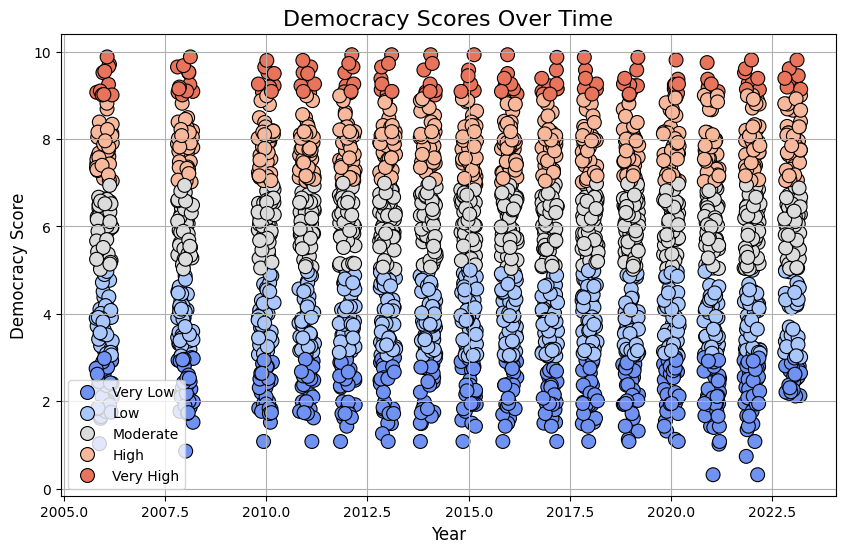

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Add jitter to the 'Year' values by creating random noise for each data point
jitter_strength = 0.2  # Adjust this value to control the amount of jitter

# Apply jitter while keeping the 'Year' values distinct and ensuring no overlap
df['Year Jittered'] = df['Year'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))

# Define the figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot all the democracy scores as dots, using the jittered years
sns.scatterplot(data=df, x='Year Jittered', y='Democracy score', hue='Democracy score Binned', palette='coolwarm', s=100, edgecolor='black')

# Highlight North Korea's score by plotting it in a different color and size
north_korea_score = df.loc[df['Entity'] == 'North Korea', 'Democracy score'].values[0]
north_korea_year = df.loc[df['Entity'] == 'North Korea', 'Year'].values[0]
north_korea_jittered_year = df.loc[df['Entity'] == 'North Korea', 'Year Jittered'].values[0]


# Add labels and title
plt.title('Democracy Scores Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Democracy Score', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [33]:
import pandas as pd

# Assuming 'df' is your dataframe that contains the democracy scores

# List of countries you want to calculate the average for
countries = [
    "Uganda", "Sierra Leone", "Guinea", "Ethiopia", "Malawi", "Comoros", 
    "Kenya", "Congo", "Mauritania", "Madagascar", "Djibouti", "Liberia", 
    "Papua New Guinea", "Guinea-Bissau", "Palestine", "Burkina Faso", 
    "Mali", "Pakistan", "Cameroon", "Nigeria", "Chad", "Sudan", "Myanmar", 
    "Niger", "Haiti", "Iraq", "Somalia", "Eswatini", "Syrian Arab Republic", 
    "Burundi", "South Sudan", "Democratic Republic of the Congo", 
    "Central African Republic", "Yemen", "Afghanistan"
]

# Filter the DataFrame for these countries
df_selected_countries = df[df['Entity'].isin(countries)]

# Calculate the average of the Democracy score for the selected countries
average_score = df_selected_countries['Democracy score'].mean()

# Print the average
print(f"The average democracy score for the selected countries is: {average_score:.4f}")


The average democracy score for the selected countries is: 3.6930


In [34]:
scores = [
    0.932, 0.928, 0.926, 0.924, 0.924, 0.924, 0.920, 0.911, 0.908, 0.904,
    0.902, 0.902, 0.892, 0.892, 0.887, 0.886, 0.885, 0.884, 0.877, 0.872,
    0.871, 0.868, 0.866, 0.864, 0.862, 0.860, 0.859, 0.859, 0.856, 0.848,
    0.846, 0.835, 0.835, 0.827, 0.826
]

# Calculate the average score
average_score = sum(scores) / len(scores)
average_score

0.8817714285714287

In [35]:
# List of values from the provided data
values = [
    0.544, 0.543, 0.539, 0.521, 0.521, 0.519, 0.511, 0.507, 0.506, 0.505, 0.504, 
    0.500, 0.487, 0.483, 0.483, 0.481, 0.481, 0.481, 0.466, 0.465, 0.462, 0.460, 
    0.451, 0.442, 0.431, 0.424, 0.417, 0.415, 0.407, 0.394, 0.388, 0.384, 0.378, 
    0.287, 0.286
]

# Calculate the average
average_value = sum(values) / len(values)
average_value

0.45922857142857143

In [36]:
import pandas as pd
import os

# Load the CSV file (replace with your actual file path if needed)
csv_file = dataset_files[0]  # Replace this with the file you want to load if necessary
csv_path = os.path.join(path, csv_file)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_path)

# List of top 35 countries with scores
top_35_countries = [
    "Denmark", "Switzerland", "Sweden", "Finland", "Iceland", "Luxembourg", "Norway", "Austria",
    "Netherlands", "New Zealand", "Australia", "Belgium", "Estonia", "Ireland", "Singapore", "Lithuania",
    "Canada", "Czechia", "Portugal", "Latvia", "Germany", "United Arab Emirates", "Japan", "France",
    "Croatia", "United Kingdom", "Poland", "Spain", "Slovakia", "South Korea", "Malta", "Hungary", 
    "Serbia", "Italy", "Bulgaria"
]

# List of low-ranking countries with scores
low_35_countries = [
    "Uganda", "Sierra Leone", "Guinea", "Ethiopia", "Malawi", "Comoros", "Kenya", "Congo", "Mauritania", 
    "Madagascar", "Djibouti", "Liberia", "Papua New Guinea", "Guinea-Bissau", "Palestine", "Burkina Faso", 
    "Mali", "Pakistan", "Cameroon", "Nigeria", "Chad", "Sudan", "Myanmar", "Niger", "Haiti", "Iraq", 
    "Somalia", "Eswatini", "Syrian Arab Republic", "Burundi", "South Sudan", "Democratic Republic of the Congo", 
    "Central African Republic", "Yemen", "Afghanistan"
]

# Filter the DataFrame to include only rows where the 'Entity' is in the top 35 or low 35 countries
df_filtered_top = df[df['Entity'].isin(top_35_countries)]
df_filtered_low = df[df['Entity'].isin(low_35_countries)]

# Calculate the average Democracy score for top 35 countries
avg_top_35 = df_filtered_top['Democracy score'].mean()

# Calculate the average Democracy score for bottom 35 countries
avg_low_35 = df_filtered_low['Democracy score'].mean()

# Print the results
print(f"Average Democracy score for Top 35 countries: {avg_top_35}")
print(f"Average Democracy score for Bottom 35 countries: {avg_low_35}")


Average Democracy score for Top 35 countries: 8.003910714285714
Average Democracy score for Bottom 35 countries: 3.6929795918367345


In [37]:
# Group the dataframe by 'Year' and calculate the average 'Democracy score' for each year
average_scores_by_year = df.groupby('Year')['Democracy score'].mean()

# Print the average scores for each year
print(average_scores_by_year)

Year
2006    5.541025
2008    5.568945
2010    5.482550
2011    5.509941
2012    5.538366
2013    5.552872
2014    5.568513
2015    5.573593
2016    5.540687
2017    5.496507
2018    5.499492
2019    5.460356
2020    5.390871
2021    5.301506
2022    5.312818
2023    5.699421
Name: Democracy score, dtype: float64


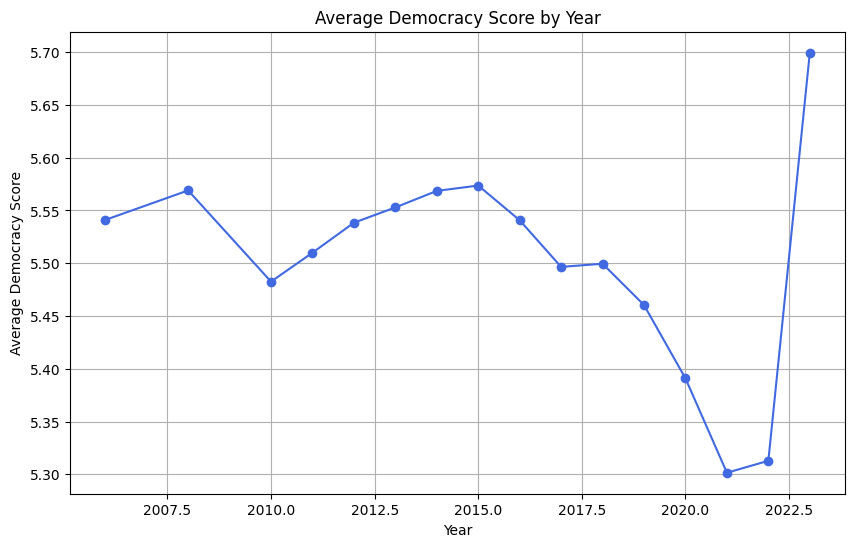

In [38]:
import matplotlib.pyplot as plt

# Group the dataframe by 'Year' and calculate the average 'Democracy score' for each year
average_scores_by_year = df.groupby('Year')['Democracy score'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_scores_by_year.index, average_scores_by_year.values, marker='o', color='royalblue')

# Adding labels and title
plt.title('Average Democracy Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Democracy Score')
plt.grid(True)

# Show plot
plt.show()


In [39]:
# List of scores for the countries provided
scores = [127.1, 123.6, 123.4, 118.7, 115.7, 110.9, 108.2, 107.8, 107.6, 105.0]

# Calculate the average score
average_score = sum(scores) / len(scores)
average_score

114.8

In [40]:
# List of countries and their respective scores
selected_countries = [
    "Luxembourg", "Qatar", "United Arab Emirates", "Switzerland", 
    "United States", "Australia", "Oman", "Netherlands", 
    "Germany", "Denmark"
]

# Assuming df is the DataFrame containing the countries and their scores
# Filter the DataFrame to include only the selected countries and for the year 2023
selected_df_2023 = df[(df['Entity'].isin(selected_countries)) & (df['Year'] == 2023)]

# Calculate the average of the 'Democracy score' column for these countries in 2023
average_score_2023 = selected_df_2023['Democracy score'].mean()

# Print the average score for 2023
print(f"Average score for selected countries in 2023: {average_score_2023}")


Average score for selected countries in 2023: 7.132


In [41]:
# List of countries and their respective scores
selected_countries_low = [
    "Indonesia", "Bangladesh", "Georgia", "Pakistan", 
    "Lebanon", "Philippines", "Egypt", "Iran", 
    "Sri Lanka", "Venezuela", "Nigeria"
]

# Assuming df is the DataFrame containing the countries and their scores
# Filter the DataFrame to include only the selected countries and for the year 2023
selected_df_low_2023 = df[(df['Entity'].isin(selected_countries_low)) & (df['Year'] == 2023)]

# Calculate the average of the 'Democracy score' column for these countries in 2023
average_score_low_2023 = selected_df_low_2023['Democracy score'].mean()

# Print the average score for 2023
print(f"Average score for selected countries in 2023: {average_score_low_2023}")


Average score for selected countries in 2023: 4.671000000000001


In [42]:
# Calculate count and average for the 'Democracy score' column
democracy_stats = df['Democracy score'].agg(['count', 'mean'])

# Display the result
print(democracy_stats)

count    2765.000000
mean        5.500987
Name: Democracy score, dtype: float64


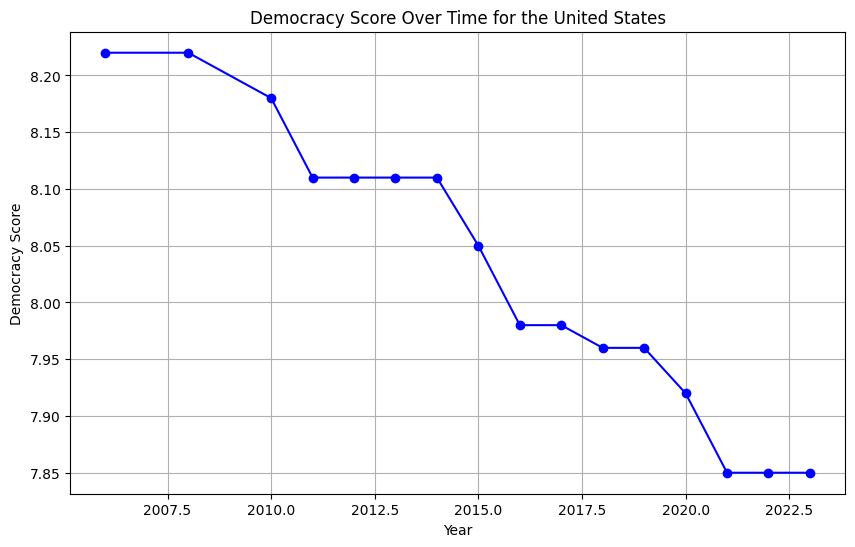

In [43]:
# Line Plot of Democracy score over Year for a specific country, e.g., United States
plt.figure(figsize=(10,6))
us_data = data[data['Entity'] == 'United States']
plt.plot(us_data['Year'], us_data['Democracy score'], marker='o', linestyle='-', color='b')
plt.title('Democracy Score Over Time for the United States')
plt.xlabel('Year')
plt.ylabel('Democracy Score')
plt.grid(True)
plt.show()

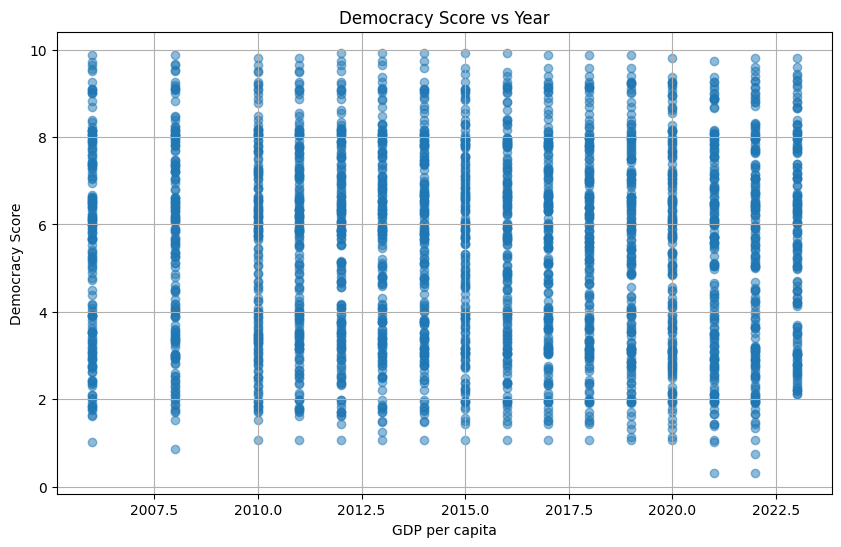

In [44]:
# Scatter Plot of Democracy score vs GDP per capita
plt.figure(figsize=(10,6))
plt.scatter(data['Year'], data['Democracy score'], alpha=0.5)
plt.title('Democracy Score vs Year')
plt.xlabel('GDP per capita')
plt.ylabel('Democracy Score')
plt.grid(True)
plt.show()


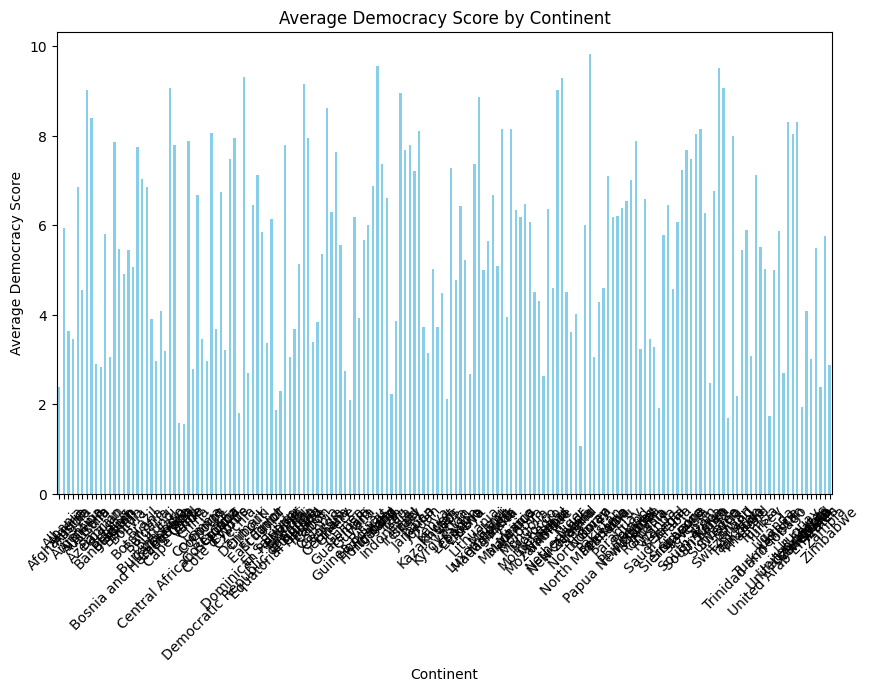

In [45]:
# Bar Chart showing average Democracy score by Continent
plt.figure(figsize=(10,6))
avg_score_by_continent = data.groupby('Entity')['Democracy score'].mean()
avg_score_by_continent.plot(kind='bar', color='skyblue')
plt.title('Average Democracy Score by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Democracy Score')
plt.xticks(rotation=45)
plt.show()
